Copyright **`(c)`** 2021 Giovanni Squillero `<squillero@polito.it>`  
`https://github.com/squillero/computational-intelligence`  
Free for personal or classroom use; see 'LICENCE.md' for details.

In [1]:
import logging
import numpy as np
from tqdm.notebook import tqdm, trange
from matplotlib import pyplot as plt

logging.basicConfig(format='[%(asctime)s] %(levelname)s: %(message)s', datefmt='%H:%M:%S', level=logging.INFO)

# 0-1 Multiple Knapsack Problem

see: [https://en.wikipedia.org/wiki/Knapsack_problem](https://en.wikipedia.org/wiki/Knapsack_problem)

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
NUM_ITEMS = 100
DIMENSIONS = 50

WEIGHTS = np.random.randint(1, 50+1, size=(NUM_ITEMS, DIMENSIONS))
MAX_WEIGHTS = np.full(DIMENSIONS, NUM_ITEMS*20)
VALUES = np.random.randint(1, 100+1, size=NUM_ITEMS)

In [4]:
def evaluate(knapsack):
    if all(np.sum(WEIGHTS[knapsack], axis=0) < MAX_WEIGHTS):
        return np.sum(VALUES[knapsack])
    else:
        return -1

## Vanilla Hill Climber

In [5]:
solution = np.full(NUM_ITEMS, False)

history = [evaluate(solution)]
for n in tqdm(range(1, 10_000+1)):
    new_solution = solution.copy()
    index = np.random.randint(0, NUM_ITEMS)
    new_solution[index] = not new_solution[index]
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        solution = new_solution
        #logging.info(f"Whoa! After {n:,} found value={evaluate(new_solution):,}")
print(f"Final value: {evaluate(solution):,}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Final value: 3,177


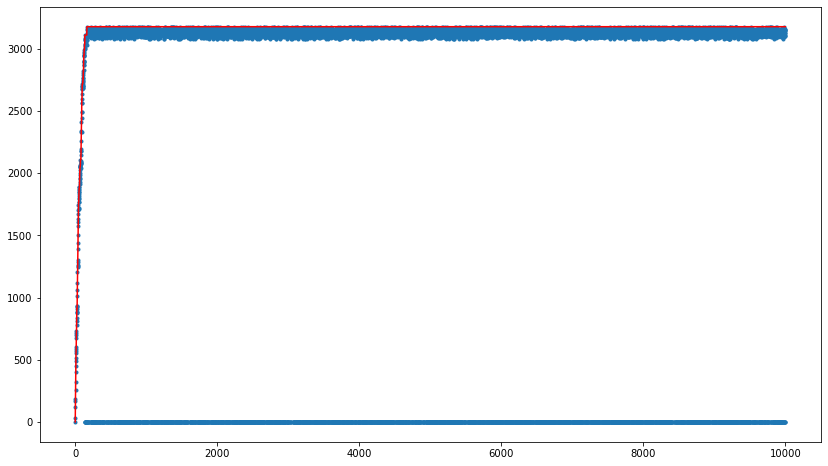

In [6]:
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')

## Hill Climber with a more powerful tweak

In [7]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < .4:
        index = np.random.randint(0, NUM_ITEMS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [8]:
solution = np.full(NUM_ITEMS, False)

history = [evaluate(solution)]
last_improvement = None
for n in tqdm(range(1, 10_000+1)):
    new_solution = tweak(solution)
    history.append(evaluate(new_solution))
    if evaluate(new_solution) > evaluate(solution):
        #logging.info(f"Whoa! After {n:,} found value={evaluate(new_solution):,}")
        last_improvement = n
        solution = new_solution
print(f"Finl value: {evaluate(solution):,} -- last improvement: {last_improvement:,}")

  0%|          | 0/10000 [00:00<?, ?it/s]

Finl value: 4,014 -- last improvement: 7,606


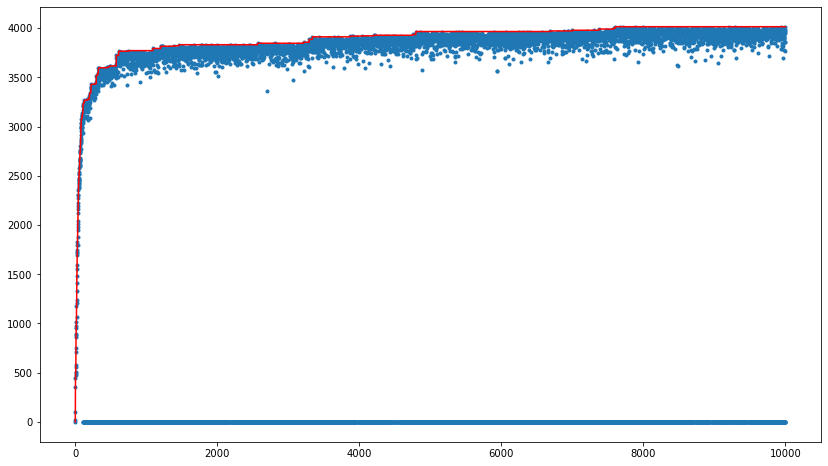

In [9]:
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')

## Steepest Step and Restart

In [10]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 3

max_value = -1
num_steps = 0
history = list()

for i in tqdm(range(0, NUM_RESTARTS), position=0, desc='Restarts'):
    solution = np.full(NUM_ITEMS, False) # restarts the solution
    history.append(evaluate(solution))

    # initialization stubs
    last_improvement = (0, 0)
    new_solution = solution

    for n in tqdm(range(1, 3000+1), position=1):
        # create candidate solutions and evaluate them
        candidates = [tweak(solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
        candidates_fitness = list()
        for c in candidates:
            f = evaluate(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))

        # keep candidate solution that yielded the steepest ascent
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        num_steps += STEEPEST_STEP_CANDIDATES

        if new_fitness > evaluate(solution):
            #logging.info(f"Whoa! After {n:,} found value={value(new_solution):,}")
            last_improvement = (i, n)
            solution = new_solution

    if evaluate(solution) > max_value:
        max_value = evaluate(solution)
        best_solution = solution

print(f"\nBest solution: {max_value} found at {last_improvement} -- total steps: {num_steps}")


Restarts:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]


Best solution: 4025 found at (2, 2292) -- total steps: 27000


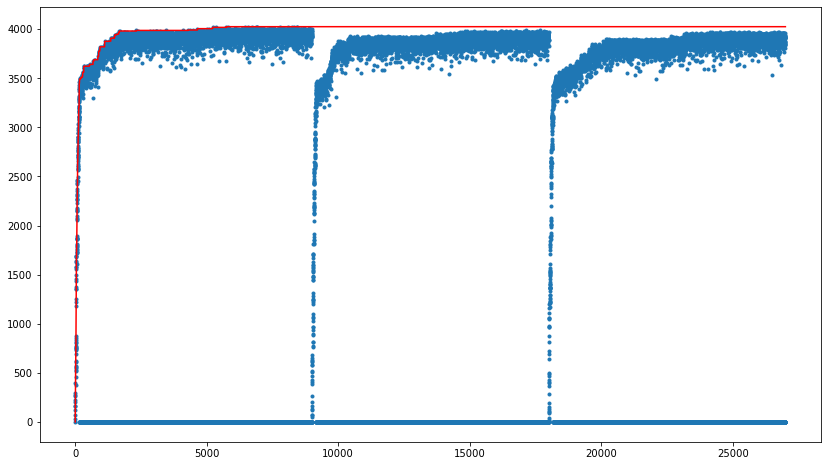

In [11]:
plt.figure(figsize=(14, 8)) 
plt.plot(range(len(history)), [max(history[:i+1]) for i in range(len(history))], color='red')
plt.scatter(range(len(history)), history, marker='.')